In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import os
import copy

import Src.YamlUtils as yu
import Src.DicData as dade
import Src.Slideshow as slide
import Src.KerasSequence as ks
import Src.ImgProcessing as img_proc
import Src.OversampleStreamData as osa
import Src.Speed as speed
import Src.Models as models
import Src.KerasCallbacks as kc

In [3]:
img_path = "Z:/ForschB/NeuroRace-Sim/forschB_data/{}/depth_camera/rgb/image_raw/compressed"
train_path = "Z:/ForschB/NeuroRace-Sim/forschB_data"

over_img_path = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_speed/{}/depth_camera/rgb/image_raw/compressed"
over_path = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_speed"


dirs = os.listdir(train_path)
over_dirs = os.listdir(over_path)


yamls = []

for d in dirs:
    yamls.append("{}/{}/{}.yaml".format(train_path, d, d))
    
over_yamls = []

for d in over_dirs:
    over_yamls.append("{}/{}/{}.yaml".format(over_path, d, "training"))

In [4]:
dicts = []

for y in yamls:
    dicts.append(dade.convert_neuro_data_to_yaml(y))

    
# over_dicts = []

# for oy in over_yamls:
#     over_dicts.append(yu.read_yaml(oy))

In [5]:
def do_all(dic):
    # dade.remove_data_with_speed_lower_than_threshold(dic)
    max_abs_speed, max_abs_steer = dade.get_max_abs_speed_and_steering(dic)
    
    # dade.add_speed_classes_to_dic(dic, threshold=0.05)
    
    # dade.normalize_dic_steering(dic, max_abs_steer)
    dade.normalize_dic_speed(dic, 10)
    
    dade.add_speed_classes_to_dic_like_steering(dic)
    
    for k in dic.keys():
        
        if "speed_class" not in dic[k].keys():
            print(k)
            print(type(k))
    
    
    dade.add_steer_classes_to_dic(dic)
    dade.add_speed_cost_weight_to_dic(dic)
    dade.add_steer_cost_weight_to_dic_classifier(dic)
    
    return max_abs_steer, max_abs_speed

In [6]:
max_steers = []
max_speeds = []

for d in dicts:
    max_steer, max_speed = do_all(d)
    max_steers.append(max_steer)
    max_speeds.append(max_speed)

In [7]:
class_key = "steering_class"

In [8]:
for key in dicts[0].keys():
    
    print(dicts[0][key])
    break

{'speed': 0.0, 'steering': 0.0070192571729421616, 'orig_speed': 0.0, 'speed_class': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'steering_class': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'speed_cost_weight': 2.903730999539383, 'steer_cost_weight': 0.23568117242410647}


In [13]:
class_key = "steering_class"
# class_key = "speed_class"

sorted_keys = []

for dic in dicts:
    
    tmp = osa.analyze_class_in_dic(dic, class_key=class_key, verbose=0)
    sorted_keys.append(tmp)

3288
3812
6149
11927
11005
11428
9655
7350
6351
6093
3552
2155
6479
89244


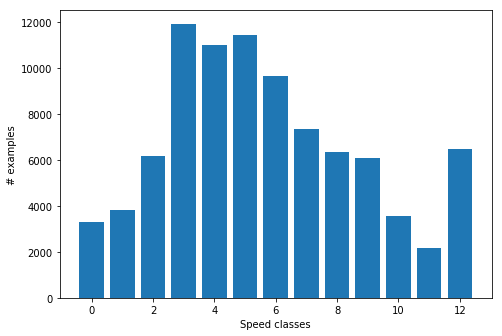

In [20]:
import copy
import matplotlib.pyplot as plt

tmp = None

for keys in sorted_keys:
    
    if tmp is None:
        tmp = copy.deepcopy(keys)
    
    else:
        for i in range(len(keys)):
            tmp[i] += keys[i]

n = 0
values = []

for i in range(len(tmp)):
    
    length = len(tmp[i])
    
    values.append(length)
    
    n += length
    
    print(length)
    
print(n)




fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabel = range(len(values))
ax.bar(xlabel, values)

# fig.xlabel = "Test"

plt.xlabel("Speed classes", )
plt.ylabel("# examples")
plt.show()

In [9]:
# _ = osa.analyze_class_in_dic(dicts[0], class_key=class_key)


for dic, folder in zip(dicts, dirs):
    
    this_img_path = img_path.format(folder)
    this_out_folder = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_steer/{}".format(folder)
    
    
    tmp = dade.convert_nero_keys_to_numbers(dic, this_img_path)
    osa.oversamle_stream_class_data(tmp, this_img_path, this_out_folder, class_key, 
                                    img_file_type="jpg", dest_img_file_type="jpg", verbose=0)

In [11]:
over_img_path = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_steer/forschB_default_110520_125722/imgs"
over_path = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_steer/forschB_default_110520_125722"

over_dirs = os.listdir(over_path)
    
over_yamls = "Z:/ForschB/NeuroRace-Sim/forschB_data_mean_over_steer/forschB_default_110520_125722/training.yaml"

over_dicts = yu.read_yaml(over_yamls)

In [12]:
do_all(over_dicts)

(0.6733298897743225, 10.0)

In [36]:
over_half_dicts = []

class_key = "steering_class"

for dic in dicts:
    analyzed_key_lists = osa.analyze_class_in_dic(dic, class_key, verbose=0)
    od = osa.oversample_class_in_dic_sorted(dic, analyzed_key_lists, class_key, verbose=0)

    over_half_dicts.append(od)

distribution in dict 

0: 0
1: 0
2: 38
3: 140
4: 489
5: 1820
6: 2972
7: 607
8: 187
9: 44
10: 7
11: 0
12: 0


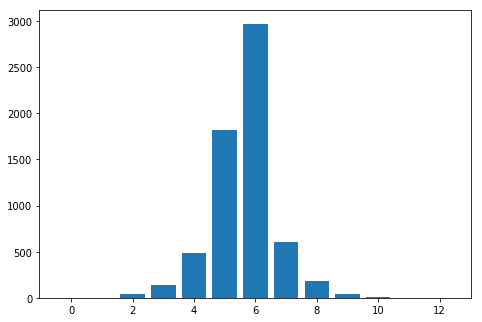

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 190
3: 700
4: 2445
5: 1820
6: 2972
7: 2428
8: 935
9: 220
10: 35
11: 0
12: 0


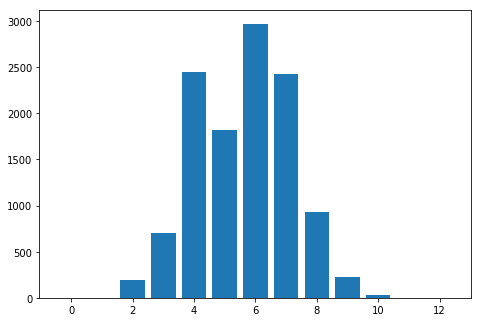

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 37
3: 76
4: 379
5: 1394
6: 1965
7: 552
8: 142
9: 29
10: 24
11: 7
12: 6


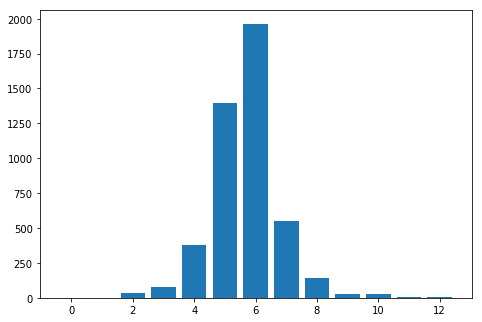

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 185
3: 380
4: 1895
5: 1394
6: 1965
7: 1656
8: 710
9: 145
10: 120
11: 35
12: 30


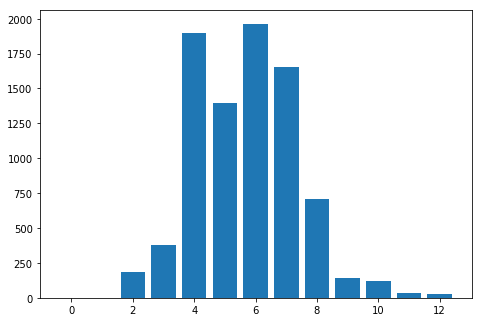

################################################
################################################
################################################
distribution in dict 

0: 4
1: 4
2: 5
3: 38
4: 189
5: 1047
6: 1161
7: 341
8: 58
9: 86
10: 6
11: 9
12: 4


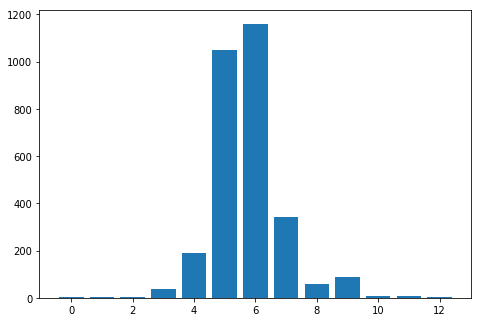

==================== OVER ======================
distribution in dict 

0: 20
1: 20
2: 25
3: 190
4: 945
5: 1047
6: 1161
7: 1023
8: 290
9: 430
10: 30
11: 45
12: 20


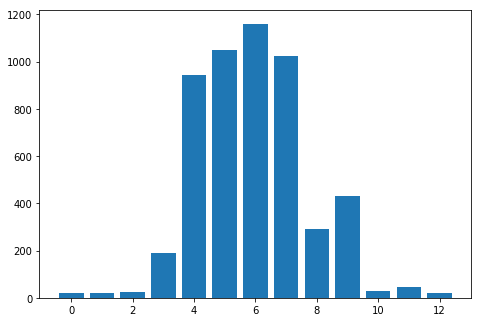

################################################
################################################
################################################
distribution in dict 

0: 5
1: 28
2: 142
3: 241
4: 199
5: 1725
6: 1943
7: 637
8: 92
9: 71
10: 48
11: 33
12: 5


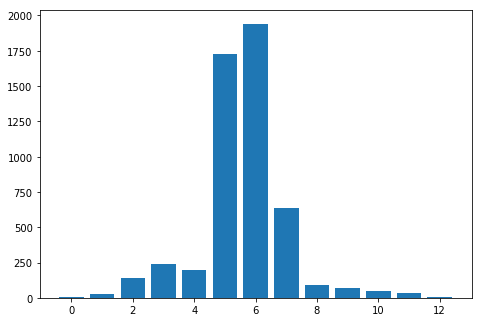

==================== OVER ======================
distribution in dict 

0: 25
1: 140
2: 710
3: 1205
4: 995
5: 1725
6: 1943
7: 1911
8: 460
9: 355
10: 240
11: 165
12: 25


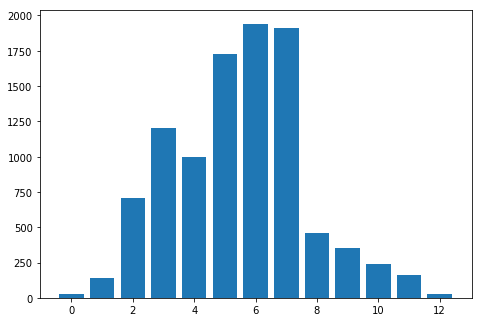

################################################
################################################
################################################
distribution in dict 

0: 60
1: 55
2: 213
3: 269
4: 528
5: 2010
6: 2373
7: 818
8: 153
9: 154
10: 105
11: 21
12: 38


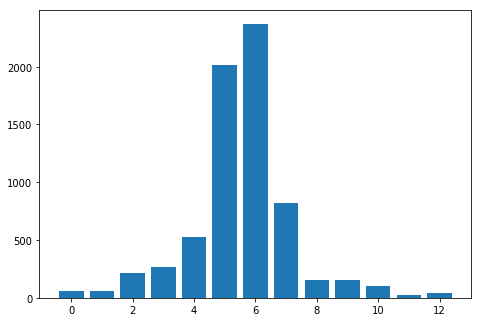

==================== OVER ======================
distribution in dict 

0: 300
1: 275
2: 1065
3: 1345
4: 2112
5: 2010
6: 2373
7: 1636
8: 765
9: 770
10: 525
11: 105
12: 190


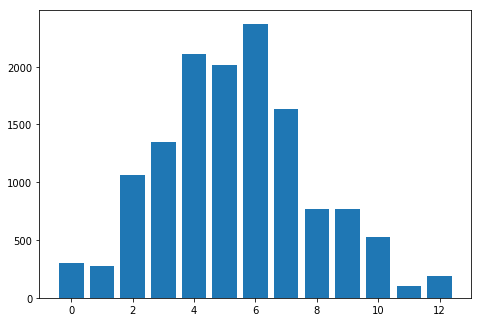

################################################
################################################
################################################
distribution in dict 

0: 13
1: 43
2: 58
3: 121
4: 154
5: 1075
6: 1180
7: 436
8: 70
9: 35
10: 23
11: 15
12: 4


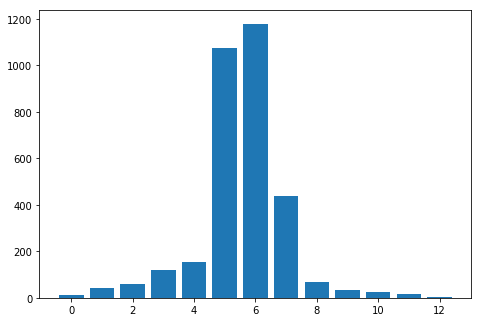

==================== OVER ======================
distribution in dict 

0: 65
1: 215
2: 290
3: 605
4: 770
5: 1075
6: 1180
7: 872
8: 350
9: 175
10: 115
11: 75
12: 20


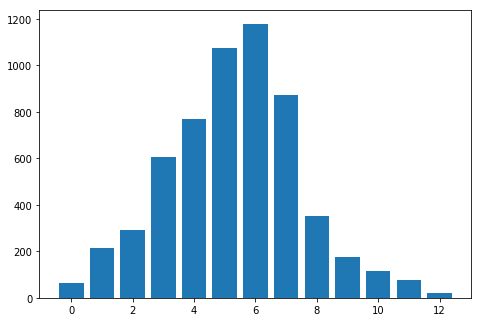

################################################
################################################
################################################
distribution in dict 

0: 0
1: 11
2: 87
3: 271
4: 179
5: 1752
6: 2357
7: 523
8: 115
9: 90
10: 46
11: 20
12: 0


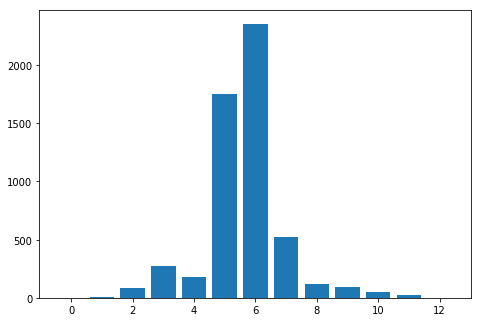

==================== OVER ======================
distribution in dict 

0: 0
1: 55
2: 435
3: 1355
4: 895
5: 1752
6: 2357
7: 2092
8: 575
9: 450
10: 230
11: 100
12: 0


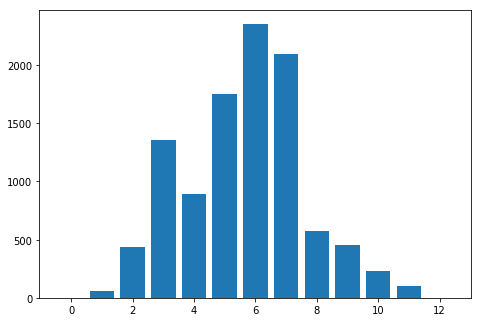

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 30
3: 92
4: 174
5: 887
6: 1013
7: 200
8: 104
9: 22
10: 25
11: 23
12: 0


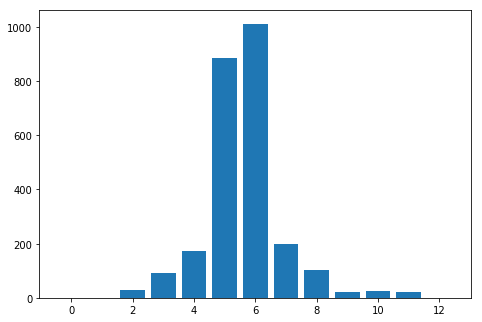

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 150
3: 460
4: 870
5: 887
6: 1013
7: 1000
8: 520
9: 110
10: 125
11: 115
12: 0


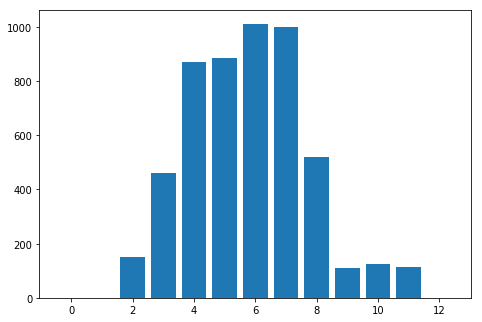

################################################
################################################
################################################
distribution in dict 

0: 6
1: 37
2: 24
3: 126
4: 260
5: 1325
6: 1418
7: 250
8: 50
9: 111
10: 91
11: 19
12: 0


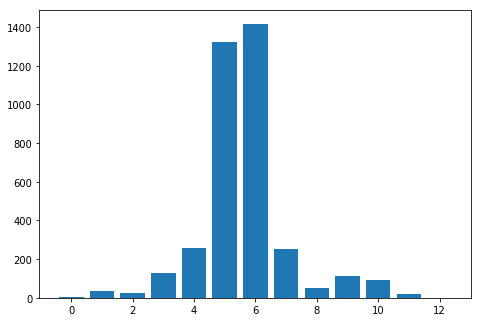

==================== OVER ======================
distribution in dict 

0: 30
1: 185
2: 120
3: 630
4: 1300
5: 1325
6: 1418
7: 1250
8: 250
9: 555
10: 455
11: 95
12: 0


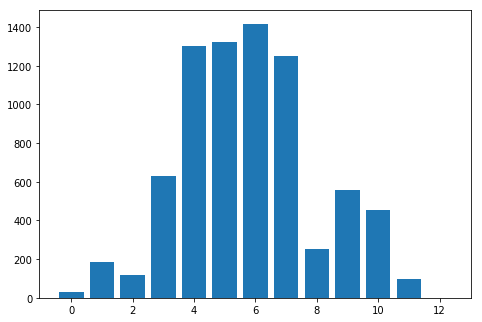

################################################
################################################
################################################
distribution in dict 

0: 7
1: 50
2: 69
3: 177
4: 332
5: 1445
6: 1812
7: 462
8: 110
9: 68
10: 49
11: 71
12: 5


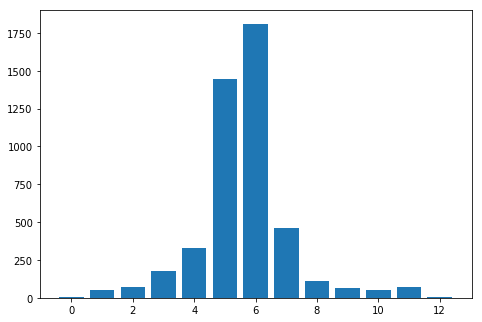

==================== OVER ======================
distribution in dict 

0: 35
1: 250
2: 345
3: 885
4: 1660
5: 1445
6: 1812
7: 1386
8: 550
9: 340
10: 245
11: 355
12: 25


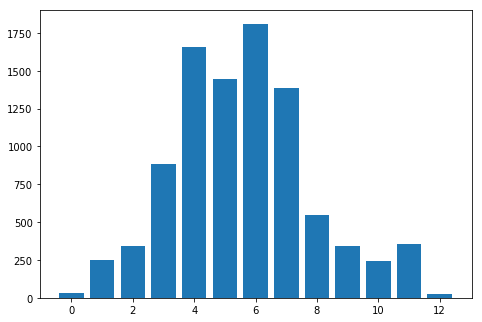

################################################
################################################
################################################
distribution in dict 

0: 0
1: 13
2: 8
3: 135
4: 350
5: 1344
6: 1591
7: 439
8: 102
9: 84
10: 0
11: 0
12: 0


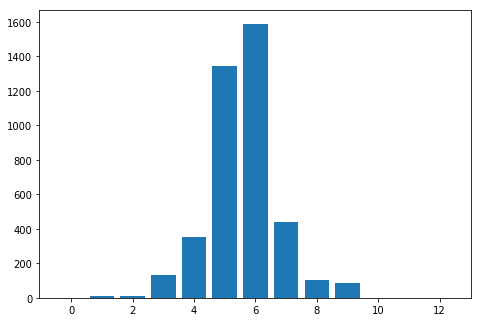

==================== OVER ======================
distribution in dict 

0: 0
1: 65
2: 40
3: 675
4: 1400
5: 1344
6: 1591
7: 1317
8: 510
9: 420
10: 0
11: 0
12: 0


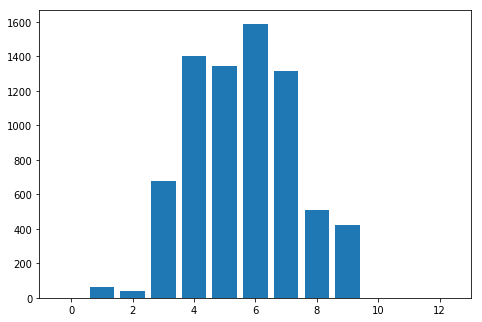

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 37
3: 105
4: 314
5: 1387
6: 1673
7: 396
8: 135
9: 75
10: 0
11: 0
12: 0


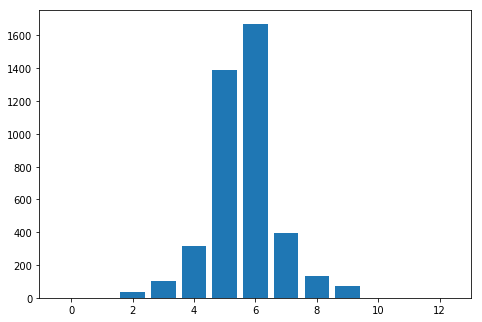

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 185
3: 525
4: 1570
5: 1387
6: 1673
7: 1584
8: 675
9: 375
10: 0
11: 0
12: 0


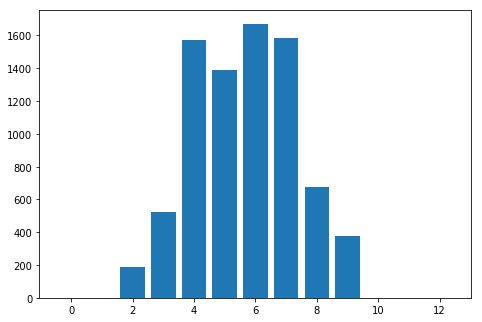

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 50
3: 163
4: 225
5: 693
6: 970
7: 366
8: 16
9: 33
10: 8
11: 46
12: 0


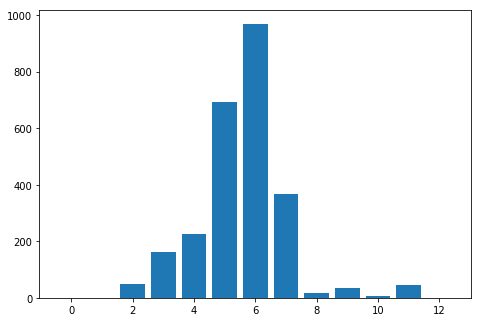

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 250
3: 815
4: 900
5: 693
6: 970
7: 732
8: 80
9: 165
10: 40
11: 230
12: 0


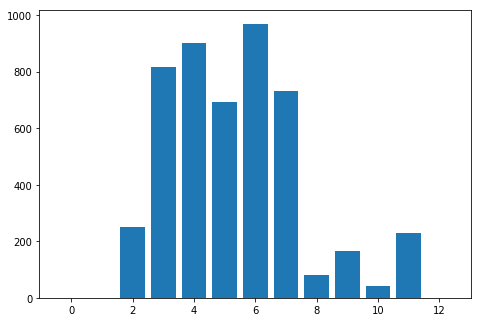

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 15
3: 69
4: 274
5: 1257
6: 1382
7: 257
8: 105
9: 55
10: 3
11: 0
12: 0


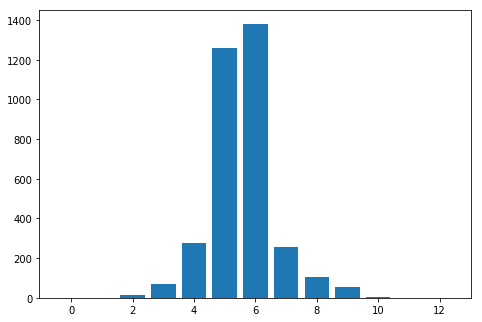

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 75
3: 345
4: 1370
5: 1257
6: 1382
7: 1285
8: 525
9: 275
10: 15
11: 0
12: 0


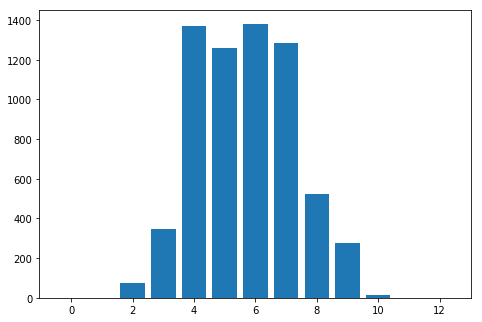

################################################
################################################
################################################
distribution in dict 

0: 0
1: 0
2: 95
3: 204
4: 309
5: 1286
6: 1887
7: 488
8: 88
9: 99
10: 49
11: 5
12: 0


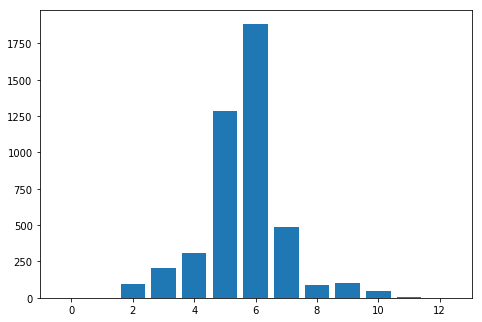

==================== OVER ======================
distribution in dict 

0: 0
1: 0
2: 475
3: 1020
4: 1545
5: 1286
6: 1887
7: 1464
8: 440
9: 495
10: 245
11: 25
12: 0


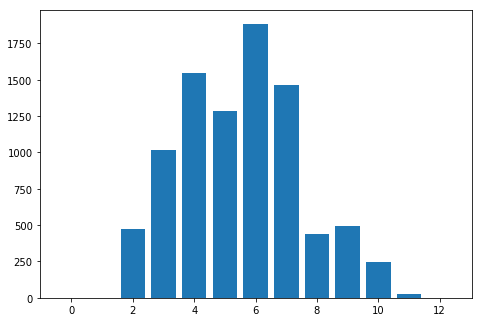

################################################
################################################
################################################
distribution in dict 

0: 0
1: 44
2: 24
3: 223
4: 559
5: 1328
6: 2280
7: 602
8: 304
9: 56
10: 42
11: 0
12: 0


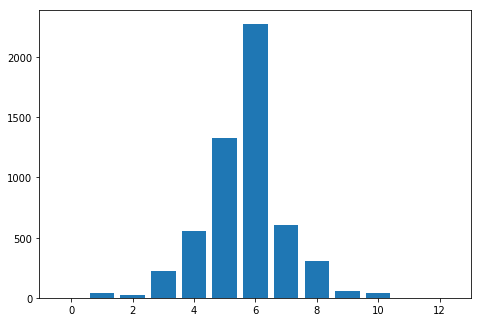

==================== OVER ======================
distribution in dict 

0: 0
1: 220
2: 120
3: 1115
4: 2236
5: 1328
6: 2280
7: 1806
8: 1520
9: 280
10: 210
11: 0
12: 0


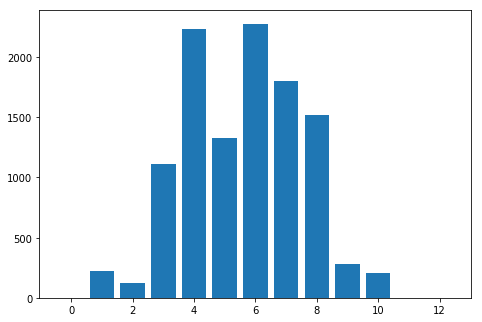

################################################
################################################
################################################
distribution in dict 

0: 71
1: 132
2: 174
3: 250
4: 504
5: 1927
6: 2137
7: 800
8: 114
9: 60
10: 107
11: 61
12: 92


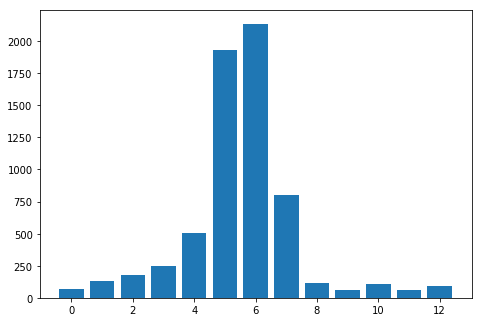

==================== OVER ======================
distribution in dict 

0: 355
1: 660
2: 870
3: 1250
4: 2016
5: 1927
6: 2137
7: 1600
8: 570
9: 300
10: 535
11: 305
12: 460


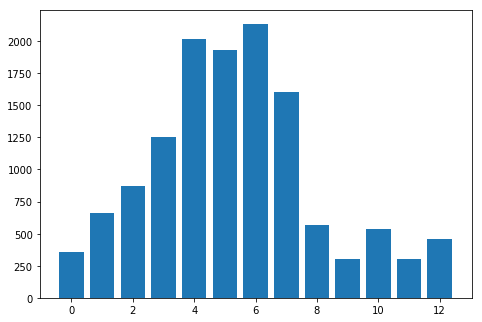

################################################
################################################
################################################
distribution in dict 

0: 48
1: 101
2: 117
3: 201
4: 136
5: 821
6: 1188
7: 491
8: 62
9: 68
10: 23
11: 37
12: 55


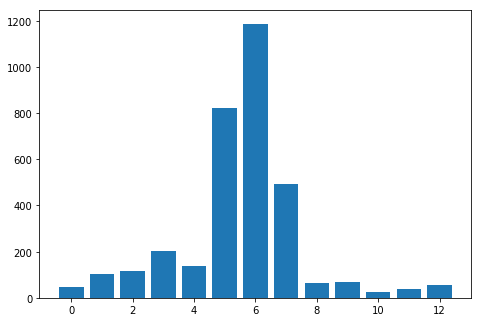

==================== OVER ======================
distribution in dict 

0: 240
1: 505
2: 585
3: 1005
4: 680
5: 821
6: 1188
7: 982
8: 310
9: 340
10: 115
11: 185
12: 275


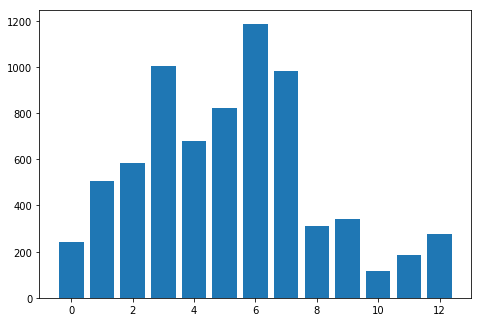

################################################
################################################
################################################
distribution in dict 

0: 75
1: 65
2: 80
3: 136
4: 129
5: 1084
6: 1192
7: 362
8: 40
9: 35
10: 34
11: 45
12: 68


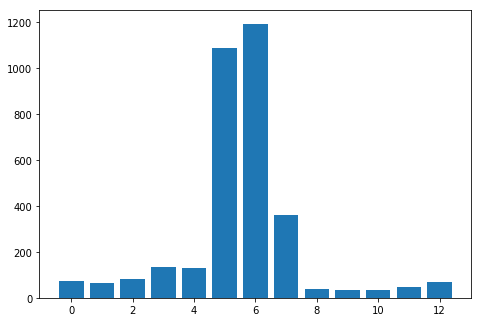

==================== OVER ======================
distribution in dict 

0: 375
1: 325
2: 400
3: 680
4: 645
5: 1084
6: 1192
7: 1086
8: 200
9: 175
10: 170
11: 225
12: 340


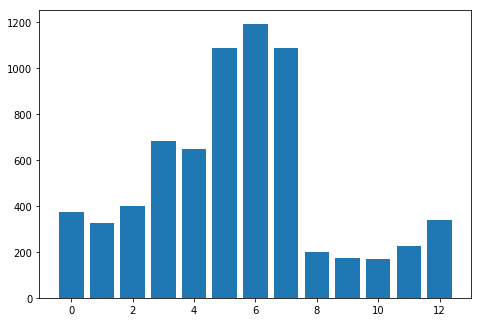

################################################
################################################
################################################
distribution in dict 

0: 87
1: 114
2: 89
3: 124
4: 172
5: 925
6: 935
7: 423
8: 55
9: 21
10: 28
11: 27
12: 147


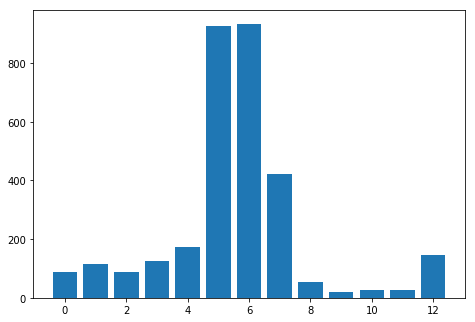

==================== OVER ======================
distribution in dict 

0: 435
1: 570
2: 445
3: 620
4: 860
5: 925
6: 935
7: 846
8: 275
9: 105
10: 140
11: 135
12: 735


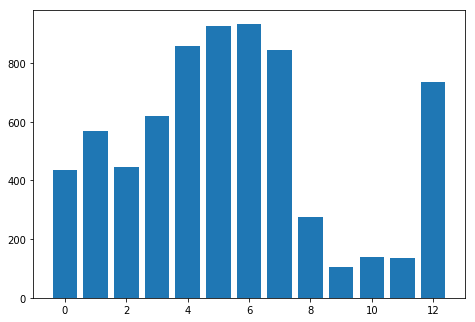

################################################
################################################
################################################
distribution in dict 

0: 100
1: 41
2: 66
3: 141
4: 159
5: 982
6: 1180
7: 394
8: 51
9: 125
10: 42
11: 29
12: 63


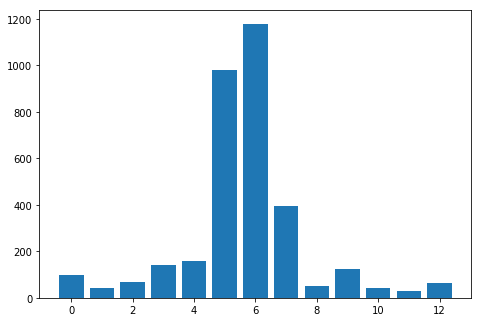

==================== OVER ======================
distribution in dict 

0: 500
1: 205
2: 330
3: 705
4: 795
5: 982
6: 1180
7: 788
8: 255
9: 625
10: 210
11: 145
12: 315


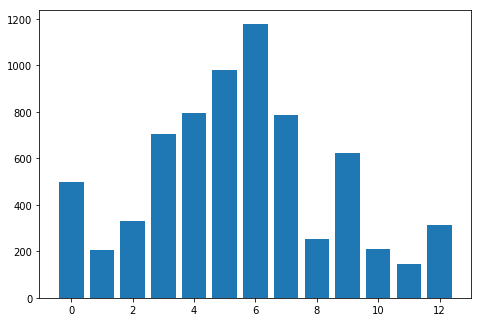

################################################
################################################
################################################


In [37]:

for d, od in zip (dicts, over_half_dicts):

    _ = osa.analyze_class_in_dic(d, class_key=class_key)

    print("==================== OVER ======================")

    _ = osa.analyze_class_in_dic(od, class_key=class_key)
    
    print("################################################")
    print("################################################")
    print("################################################")

In [15]:
slide.slideshow(over_dicts, over_img_path, hz=37, img_file_type="jpg")

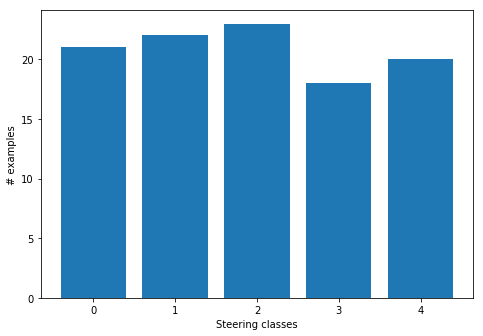

In [8]:
import matplotlib.pyplot as plt

# values = [281, 55, 258, 701, 1409, 4291, 13235, 5607, 1678, 754, 384, 222, 186]
# values = [13235 - 281, 
#           13235 - 55, 
#           13235 - 258, 
#           13235 - 701, 
#           13235 - 1409, 
#           13235 - 1291, 
#           13235,
#           13235 - 1607,
#           13235 - 1678,
#           13235 - 754,
#           13235 - 384,
#           13235 - 222,
#           13235 - 186]

# values = [3, 11, 23, 9, 4]
values = [21, 22, 23, 18, 20]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabel = range(len(values))
ax.bar(xlabel, values)

# fig.xlabel = "Test"

plt.xlabel("Steering classes", )
plt.ylabel("# examples")
plt.show()

In [9]:
import cv2

In [10]:
img1 = cv2.imread("test_data/0000000000000.jpg")
img2 = cv2.imread("test_data/0000000000001.jpg")

In [12]:
img1 = img1 / 255.0
img2 = img2 / 255.0

In [25]:
img3 = (img2 - img1)

img3 = img3 * 255

cv2.imwrite("test_data/diff_img.jpg", img3)

cv2.imshow("test", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
import Src.KerasSequence as ks
import Src.ImgProcessing as ip

In [33]:
img_processor = ip.ImgProcessor()

img_processor.crop = True
img_processor.augment = False

img_processor.fx = 0.1
img_processor.fy = 0.2

In [34]:
i = 0

test = ks.SequenceGeneratorRegression(dicts[i], img_path.format(dirs[i]), img_processor, sequence_size=32, 
                                      img_file_type="jpg", class_dist=sorted_keys[i], class_key="steering_class")

test.return_speed_input = True        
test.return_steer_input = True

test.return_speed_output = False        
test.return_steer_output = True

test.return_speed_weights = False
test.return_steer_weights = False

In [35]:
import cv2

In [36]:
for [img_batch, _, _], _ in test:
    
    for img_seq in img_batch:
        
        for img in img_seq:
            
            img = cv2.resize(img, (400,400))
            
            cv2.imshow("test", img)
            cv2.waitKey(20)
            
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [38]:
import copy

def every_second_key(dicts):
    
    result = []
    
    for dic in dicts:
    
        r = {}
        
        doit = True
        
        for key in dic.keys():
            
            if doit:
                r[key] = copy.deepcopy(dic[key])
                doit = False
                
            else:
                doit = True
                
        result.append(r)
            
    return result

In [39]:
every_second_key_dicts = every_second_key(dicts)

distribution in dict 

0: 0
1: 0
2: 38
3: 140
4: 489
5: 1820
6: 2972
7: 607
8: 187
9: 44
10: 7
11: 0
12: 0


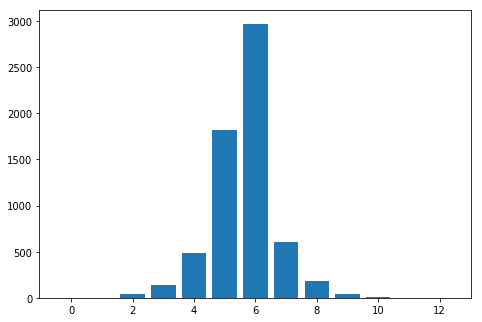

distribution in dict 

0: 0
1: 0
2: 18
3: 69
4: 247
5: 908
6: 1489
7: 303
8: 93
9: 22
10: 3
11: 0
12: 0


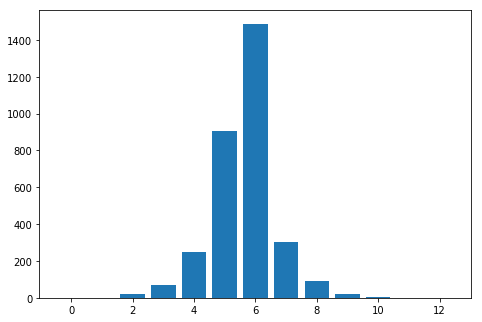

In [41]:
class_key = "steering_class"

i = 0 

analyzed_key_lists = osa.analyze_class_in_dic(dicts[i], class_key, verbose=1)
analyzed_key_lists = osa.analyze_class_in_dic(every_second_key_dicts[i], class_key, verbose=1)